In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df_infarto = pd.read_csv('../data/bq-results-infarto-2015-2022.csv')
df_2022 = pd.read_csv('../data/bq-results-NE-2022-100k.csv')
df_2021 = pd.read_csv('../data/bq-results-NE-2021-100k.csv')
df_2020 = pd.read_csv('../data/bq-results-NE-2020-100k.csv')
df_2019 = pd.read_csv('../data/bq-results-NE-2019-100k.csv')
df_2018 = pd.read_csv('../data/bq-results-NE-2018-100k.csv')
dfs = [df_2018,df_2019,df_2020,df_2021,df_2022]
df_all = pd.concat(dfs, ignore_index=True)

/var/folders/ym/vtsfljl13gj6ms14j1387nhc0000gn/T/ipykernel_22370/2586998679.py:1: DtypeWarning: Columns (57,60,61,74,86) have mixed types. Specify dtype option on import or set low_memory=False.
  df_infarto = pd.read_csv('../data/bq-results-infarto-2015-2022.csv')
/var/folders/ym/vtsfljl13gj6ms14j1387nhc0000gn/T/ipykernel_22370/2586998679.py:2: DtypeWarning: Columns (57,74,86) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv('../data/bq-results-NE-2022-100k.csv')
/var/folders/ym/vtsfljl13gj6ms14j1387nhc0000gn/T/ipykernel_22370/2586998679.py:3: DtypeWarning: Columns (57,74,86) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2021 = pd.read_csv('../data/bq-results-NE-2021-100k.csv')
/var/folders/ym/vtsfljl13gj6ms14j1387nhc0000gn/T/ipykernel_22370/2586998679.py:4: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020 = pd.read_csv('../data/bq-results-NE-

In [17]:
# Filtrar o DataFrame para pessoas com 60 anos ou mais
df_infarto_maior_60 = df_infarto[df_infarto['idade'] >= 60]

# Filtrar o DataFrame para pessoas com menos de 60 anos
df_infarto_menor_60 = df_infarto[df_infarto['idade'] < 60]


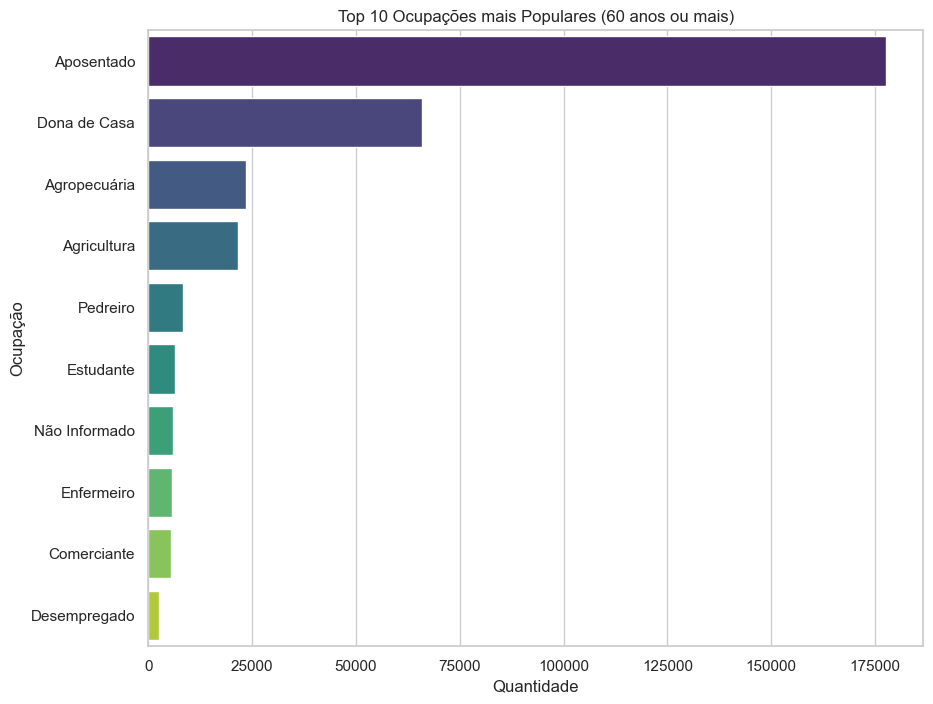

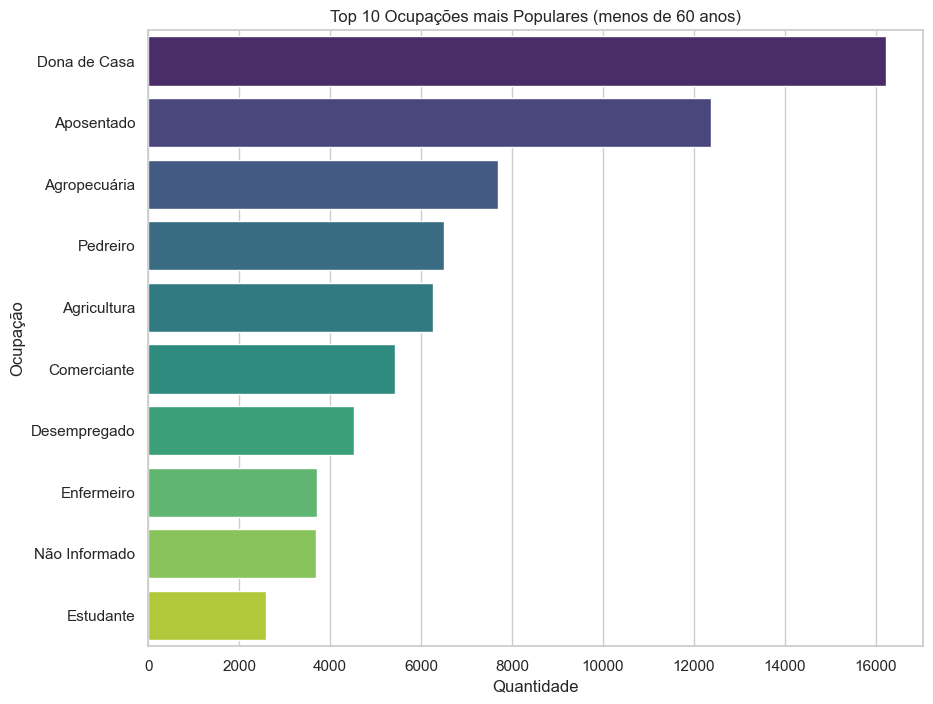

Proporção de Ocupações (60 anos ou mais):
ocupacao
Aposentado       54.99
Dona de Casa     20.39
Agropecuária      7.28
Agricultura       6.65
Pedreiro          2.61
Estudante         2.01
Não Informado     1.80
Enfermeiro        1.79
Comerciante       1.68
Desempregado      0.80
Name: count, dtype: float64

Proporção de Ocupações (menos de 60 anos):
ocupacao
Dona de Casa     23.53
Aposentado       17.92
Agropecuária     11.15
Pedreiro          9.43
Agricultura       9.09
Comerciante       7.87
Desempregado      6.54
Enfermeiro        5.36
Não Informado     5.36
Estudante         3.75
Name: count, dtype: float64


In [18]:
# Mapeamento para ocupação
mapeamento_ocupacao = {
    999992.0: 'Dona de Casa',
    999993.0: 'Aposentado',
    621005.0: 'Agropecuária',
    715210.0: 'Pedreiro',
    622020.0: 'Agricultura',
    354705.0: 'Comerciante',
    999994.0: 'Desempregado',
    512105.0: 'Enfermeiro',
    998999.0: 'Não Informado',
    141410.0: 'Estudante',
}

# Calcular as contagens de ocupações para pessoas com 60 anos ou mais
ocupacao_counts_maior_60 = df_infarto_maior_60['ocupacao'].map(mapeamento_ocupacao).value_counts().head(10)

# Calcular as contagens de ocupações para pessoas com menos de 60 anos
ocupacao_counts_menor_60 = df_infarto_menor_60['ocupacao'].map(mapeamento_ocupacao).value_counts().head(10)

# Plotar gráfico de contagem de ocupações para pessoas com 60 anos ou mais
plt.figure(figsize=(10, 8))
sns.barplot(x=ocupacao_counts_maior_60.values, y=ocupacao_counts_maior_60.index, palette='viridis')
plt.title('Top 10 Ocupações mais Populares (60 anos ou mais)')
plt.xlabel('Quantidade')
plt.ylabel('Ocupação')
plt.savefig('ocupacoes_maior_60.png', bbox_inches='tight')  # Salvar como PNG
plt.show()

# Plotar gráfico de contagem de ocupações para pessoas com menos de 60 anos
plt.figure(figsize=(10, 8))
sns.barplot(x=ocupacao_counts_menor_60.values, y=ocupacao_counts_menor_60.index, palette='viridis')
plt.title('Top 10 Ocupações mais Populares (menos de 60 anos)')
plt.xlabel('Quantidade')
plt.ylabel('Ocupação')
plt.savefig('ocupacoes_menor_60.png', bbox_inches='tight')  # Salvar como PNG
plt.show()

# Calcular a proporção de ocupações para pessoas com 60 anos ou mais
proporcao_ocupacoes_maior_60 = (ocupacao_counts_maior_60 / ocupacao_counts_maior_60.sum() * 100).round(2)

# Calcular a proporção de ocupações para pessoas com menos de 60 anos
proporcao_ocupacoes_menor_60 = (ocupacao_counts_menor_60 / ocupacao_counts_menor_60.sum() * 100).round(2)

# Imprimir a proporção de ocupações para pessoas com 60 anos ou mais
print("Proporção de Ocupações (60 anos ou mais):")
print(proporcao_ocupacoes_maior_60)

# Imprimir a proporção de ocupações para pessoas com menos de 60 anos
print("\nProporção de Ocupações (menos de 60 anos):")
print(proporcao_ocupacoes_menor_60)


Distribuição do Local de Ocorrência (60 anos ou mais):
local_ocorrencia
Hospital                            243102
Domicílio                           172776
Outros estabelecimentos de saúde     46932
Outros                               14814
Via pública                           6208
Ignorado                               235
Name: count, dtype: int64

Proporções em % (60 anos ou mais):
local_ocorrencia
Hospital                            50.219800
Domicílio                           35.691916
Outros estabelecimentos de saúde     9.695172
Outros                               3.060263
Via pública                          1.282443
Ignorado                             0.048546
Name: count, dtype: float64

Distribuição do Local de Ocorrência (menos de 60 anos):
local_ocorrencia
Hospital                            71161
Domicílio                           48582
Outros estabelecimentos de saúde    19355
Outros                               8089
Via pública                          5222
Ign

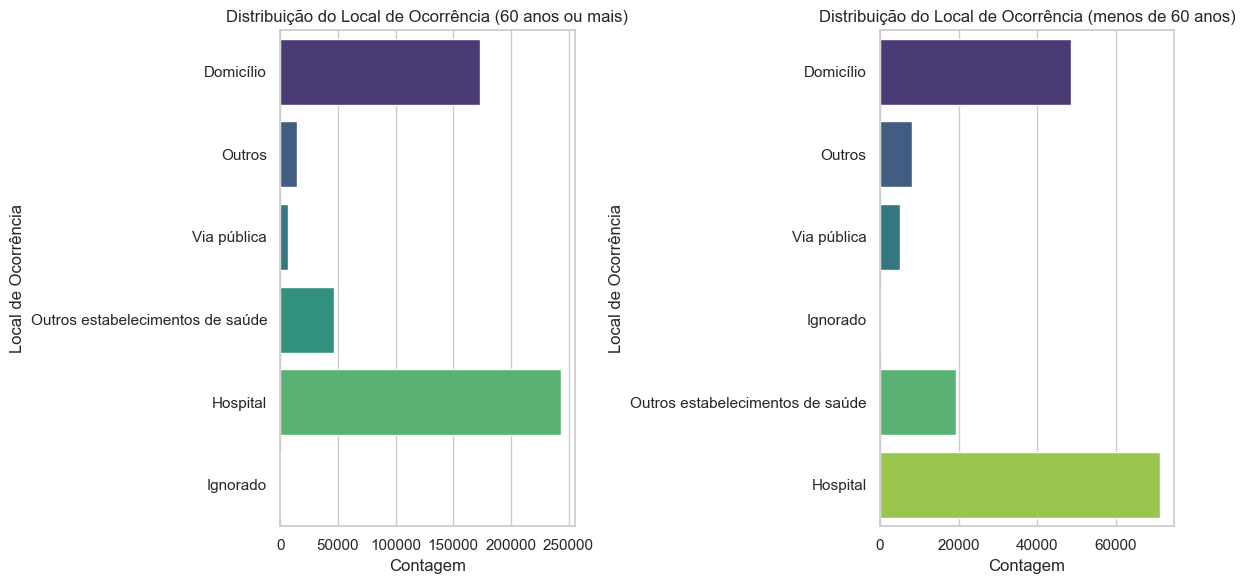

In [19]:
# Criar um mapeamento para os valores do local de ocorrência
mapeamento_local_ocorrencia = {
    1: 'Hospital',
    2: 'Outros estabelecimentos de saúde',
    3: 'Domicílio',
    4: 'Via pública',
    5: 'Outros',
    9: 'Ignorado'
}

# Aplicar o mapeamento às colunas correspondentes em ambos os DataFrames
df_infarto_maior_60 = df_infarto_maior_60.copy()  # Criar uma cópia para evitar o SettingWithCopyWarning
df_infarto_menor_60 = df_infarto_menor_60.copy()  # Criar uma cópia para evitar o SettingWithCopyWarning
df_infarto_maior_60['local_ocorrencia'] = df_infarto_maior_60['local_ocorrencia'].map(mapeamento_local_ocorrencia)
df_infarto_menor_60['local_ocorrencia'] = df_infarto_menor_60['local_ocorrencia'].map(mapeamento_local_ocorrencia)

# Calcular as contagens para cada local de ocorrência em ambos os DataFrames
local_counts_maior_60 = df_infarto_maior_60['local_ocorrencia'].value_counts()
local_counts_menor_60 = df_infarto_menor_60['local_ocorrencia'].value_counts()

# Calcular as proporções em relação ao total em ambos os DataFrames
total_registros_maior_60 = len(df_infarto_maior_60)
total_registros_menor_60 = len(df_infarto_menor_60)

proporcoes_locais_maior_60 = local_counts_maior_60 / total_registros_maior_60 * 100
proporcoes_locais_menor_60 = local_counts_menor_60 / total_registros_menor_60 * 100

# Imprimir as contagens e proporções
print("Distribuição do Local de Ocorrência (60 anos ou mais):")
print(local_counts_maior_60)
print("\nProporções em % (60 anos ou mais):")
print(proporcoes_locais_maior_60)

print("\nDistribuição do Local de Ocorrência (menos de 60 anos):")
print(local_counts_menor_60)
print("\nProporções em % (menos de 60 anos):")
print(proporcoes_locais_menor_60)

# Plotar gráficos de contagem para o local de ocorrência em ambos os grupos
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df_infarto_maior_60, y='local_ocorrencia', palette='viridis')
plt.title('Distribuição do Local de Ocorrência (60 anos ou mais)')
plt.xlabel('Contagem')
plt.ylabel('Local de Ocorrência')
plt.savefig('distribuicao_local_ocorrencia_maior_60.png', bbox_inches='tight')  # Salvar como PNG

plt.subplot(1, 2, 2)
sns.countplot(data=df_infarto_menor_60, y='local_ocorrencia', palette='viridis')
plt.title('Distribuição do Local de Ocorrência (menos de 60 anos)')
plt.xlabel('Contagem')
plt.ylabel('Local de Ocorrência')
plt.savefig('distribuicao_local_ocorrencia_menor_60.png', bbox_inches='tight')  # Salvar como PNG
plt.tight_layout()
plt.show()


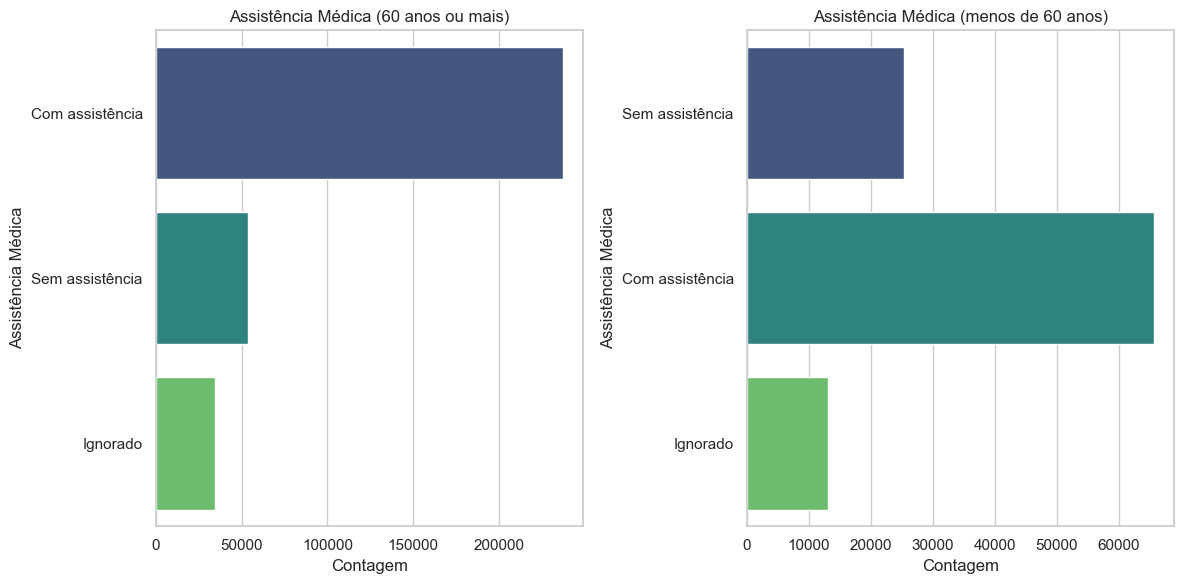

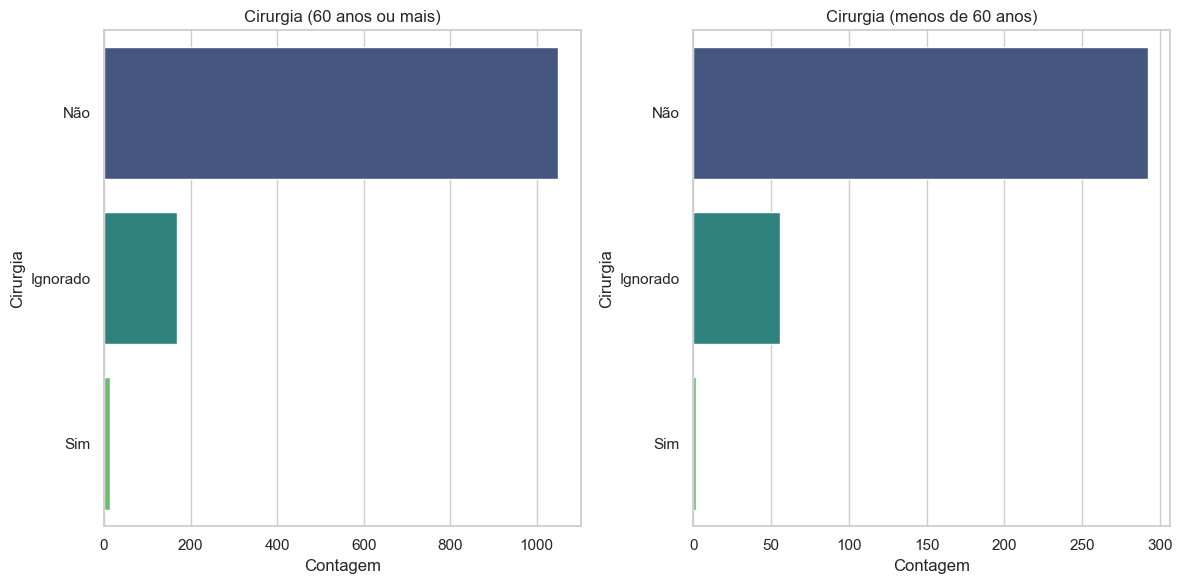

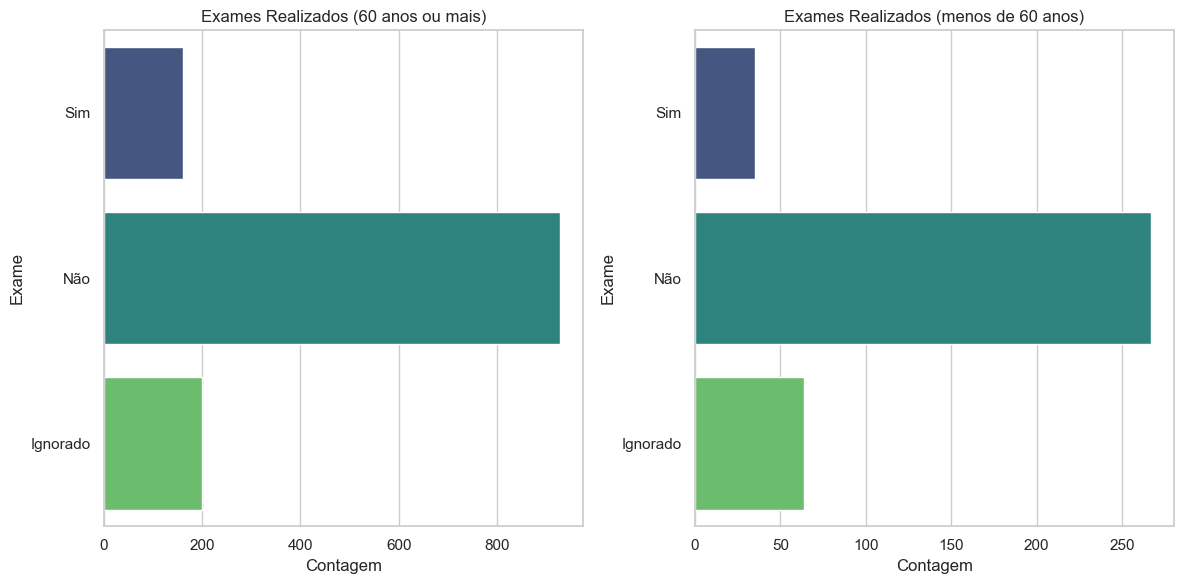

Contagem de Assistência Médica (60 anos ou mais):
 assistencia_medica
Com assistência    237179
Sem assistência     53912
Ignorado            34560
Name: count, dtype: int64

Proporções de Assistência Médica (60 anos ou mais) (%):
 assistencia_medica
Com assistência    72.832265
Sem assistência    16.555146
Ignorado           10.612588
Name: count, dtype: float64

Contagem de Assistência Médica (menos de 60 anos):
 assistencia_medica
Com assistência    65676
Sem assistência    25331
Ignorado           13134
Name: count, dtype: int64

Proporções de Assistência Médica (menos de 60 anos) (%):
 assistencia_medica
Com assistência    63.064499
Sem assistência    24.323753
Ignorado           12.611748
Name: count, dtype: float64

Contagem de Cirurgia (60 anos ou mais):
 cirurgia
Não         1050
Ignorado     169
Sim           13
Name: count, dtype: int64

Proporções de Cirurgia (60 anos ou mais) (%):
 cirurgia
Não         85.227273
Ignorado    13.717532
Sim          1.055195
Name: count, dtyp

In [20]:
mapeamento_assistencia = {
    9: 'Ignorado',
    1: 'Com assistência',
    2: 'Sem assistência'
}

mapeamento_cirurgia = {
    9: 'Ignorado',
    1: 'Sim',
    2: 'Não'
}

mapeamento_exame = {
    9: 'Ignorado',
    1: 'Sim',
    2: 'Não'
}

# Aplicar os mapeamentos às colunas correspondentes em ambos os DataFrames
df_infarto_maior_60['assistencia_medica'] = df_infarto_maior_60['assistencia_medica'].map(mapeamento_assistencia)
df_infarto_maior_60['cirurgia'] = df_infarto_maior_60['cirurgia'].map(mapeamento_cirurgia)
df_infarto_maior_60['exame'] = df_infarto_maior_60['exame'].map(mapeamento_exame)

df_infarto_menor_60['assistencia_medica'] = df_infarto_menor_60['assistencia_medica'].map(mapeamento_assistencia)
df_infarto_menor_60['cirurgia'] = df_infarto_menor_60['cirurgia'].map(mapeamento_cirurgia)
df_infarto_menor_60['exame'] = df_infarto_menor_60['exame'].map(mapeamento_exame)

# Plotar gráficos de contagem para assistência médica nos dois grupos etários
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df_infarto_maior_60, y='assistencia_medica', palette='viridis')
plt.title('Assistência Médica (60 anos ou mais)')
plt.xlabel('Contagem')
plt.ylabel('Assistência Médica')
plt.savefig('assistencia_medica_maior_60.png', bbox_inches='tight')  # Salvar como PNG

plt.subplot(1, 2, 2)
sns.countplot(data=df_infarto_menor_60, y='assistencia_medica', palette='viridis')
plt.title('Assistência Médica (menos de 60 anos)')
plt.xlabel('Contagem')
plt.ylabel('Assistência Médica')
plt.savefig('assistencia_medica_menor_60.png', bbox_inches='tight')  # Salvar como PNG
plt.tight_layout()
plt.show()

# Plotar gráficos de contagem para cirurgia nos dois grupos etários
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df_infarto_maior_60, y='cirurgia', palette='viridis')
plt.title('Cirurgia (60 anos ou mais)')
plt.xlabel('Contagem')
plt.ylabel('Cirurgia')
plt.savefig('cirurgia_maior_60.png', bbox_inches='tight')  # Salvar como PNG

plt.subplot(1, 2, 2)
sns.countplot(data=df_infarto_menor_60, y='cirurgia', palette='viridis')
plt.title('Cirurgia (menos de 60 anos)')
plt.xlabel('Contagem')
plt.ylabel('Cirurgia')
plt.savefig('cirurgia_menor_60.png', bbox_inches='tight')  # Salvar como PNG
plt.tight_layout()
plt.show()

# Plotar gráficos de contagem para exames nos dois grupos etários
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df_infarto_maior_60, y='exame', palette='viridis')
plt.title('Exames Realizados (60 anos ou mais)')
plt.xlabel('Contagem')
plt.ylabel('Exame')
plt.savefig('exames_realizados_maior_60.png', bbox_inches='tight')  # Salvar como PNG

plt.subplot(1, 2, 2)
sns.countplot(data=df_infarto_menor_60, y='exame', palette='viridis')
plt.title('Exames Realizados (menos de 60 anos)')
plt.xlabel('Contagem')
plt.ylabel('Exame')
plt.savefig('exames_realizados_menor_60.png', bbox_inches='tight')  # Salvar como PNG
plt.tight_layout()
plt.show()

# Calculando contagens e proporções para assistência médica nos dois grupos etários
contagem_assistencia_medica_maior_60 = df_infarto_maior_60['assistencia_medica'].value_counts()
proporcoes_assistencia_medica_maior_60 = contagem_assistencia_medica_maior_60 / len(df_infarto_maior_60[df_infarto_maior_60['assistencia_medica'].notnull()]) * 100

contagem_assistencia_medica_menor_60 = df_infarto_menor_60['assistencia_medica'].value_counts()
proporcoes_assistencia_medica_menor_60 = contagem_assistencia_medica_menor_60 / len(df_infarto_menor_60[df_infarto_menor_60['assistencia_medica'].notnull()]) * 100

# Calculando contagens e proporções para cirurgia nos dois grupos etários
contagem_cirurgia_maior_60 = df_infarto_maior_60['cirurgia'].value_counts()
proporcoes_cirurgia_maior_60 = contagem_cirurgia_maior_60 / len(df_infarto_maior_60[df_infarto_maior_60['cirurgia'].notnull()]) * 100

contagem_cirurgia_menor_60 = df_infarto_menor_60['cirurgia'].value_counts()
proporcoes_cirurgia_menor_60 = contagem_cirurgia_menor_60 / len(df_infarto_menor_60[df_infarto_menor_60['cirurgia'].notnull()]) * 100

# Calculando contagens e proporções para exames nos dois grupos etários
contagem_exame_maior_60 = df_infarto_maior_60['exame'].value_counts()
proporcoes_exame_maior_60 = contagem_exame_maior_60 / len(df_infarto_maior_60[df_infarto_maior_60['exame'].notnull()]) * 100

contagem_exame_menor_60 = df_infarto_menor_60['exame'].value_counts()
proporcoes_exame_menor_60 = contagem_exame_menor_60 / len(df_infarto_menor_60[df_infarto_menor_60['exame'].notnull()]) * 100

# Imprimir as contagens e proporções
print("Contagem de Assistência Médica (60 anos ou mais):\n", contagem_assistencia_medica_maior_60)
print("\nProporções de Assistência Médica (60 anos ou mais) (%):\n", proporcoes_assistencia_medica_maior_60)
print("\nContagem de Assistência Médica (menos de 60 anos):\n", contagem_assistencia_medica_menor_60)
print("\nProporções de Assistência Médica (menos de 60 anos) (%):\n", proporcoes_assistencia_medica_menor_60)

print("\nContagem de Cirurgia (60 anos ou mais):\n", contagem_cirurgia_maior_60)
print("\nProporções de Cirurgia (60 anos ou mais) (%):\n", proporcoes_cirurgia_maior_60)
print("\nContagem de Cirurgia (menos de 60 anos):\n", contagem_cirurgia_menor_60)
print("\nProporções de Cirurgia (menos de 60 anos) (%):\n", proporcoes_cirurgia_menor_60)

print("\nContagem de Exames Realizados (60 anos ou mais):\n", contagem_exame_maior_60)
print("\nProporções de Exames Realizados (60 anos ou mais) (%):\n", proporcoes_exame_maior_60)
print("\nContagem de Exames Realizados (menos de 60 anos):\n", contagem_exame_menor_60)
print("\nProporções de Exames Realizados (menos de 60 anos) (%):\n", proporcoes_exame_menor_60)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


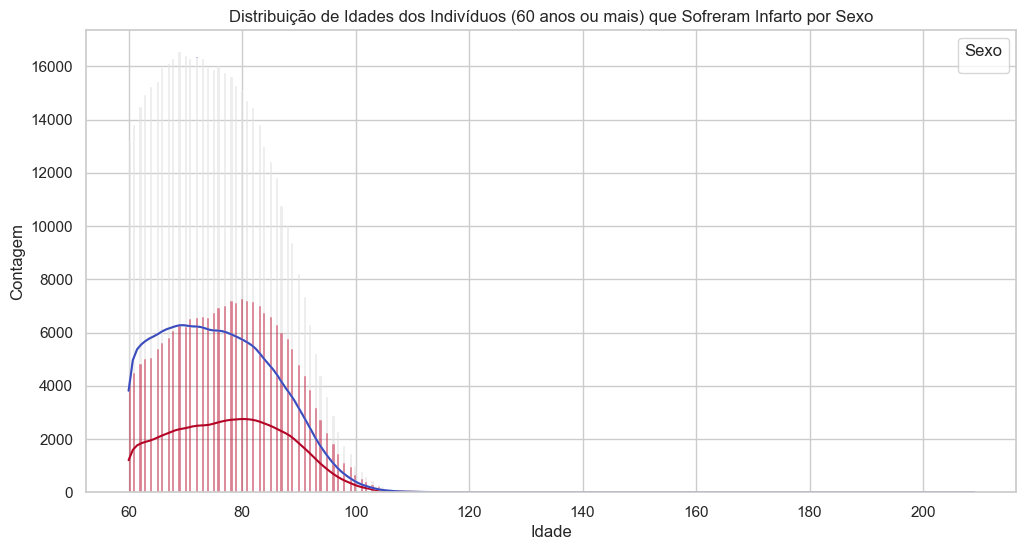

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


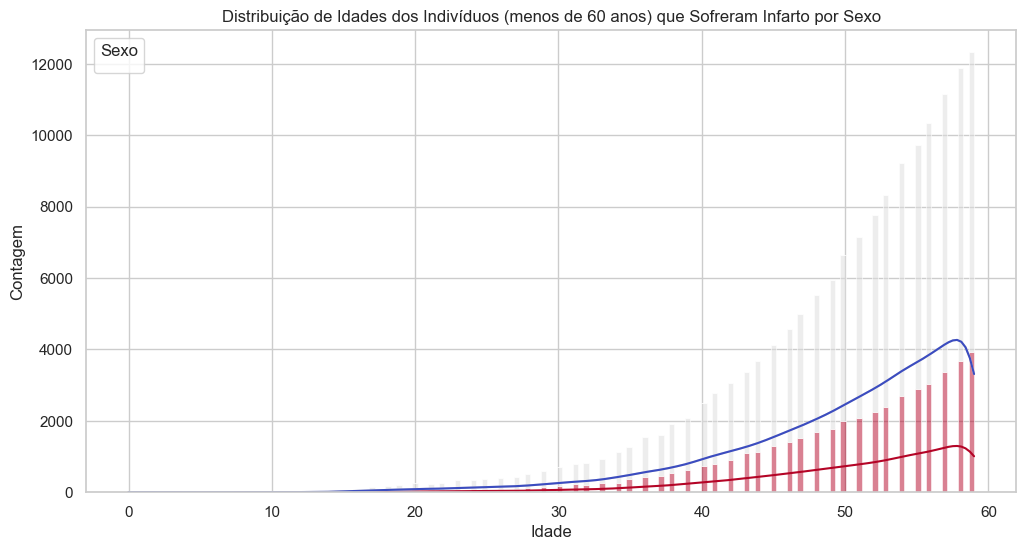

In [21]:
# Definir o estilo do seaborn
sns.set(style="whitegrid")
# Criar o gráfico de distribuição de idades por sexo e raça/cor para maiores de 60 anos
plt.figure(figsize=(12, 6))
sns.histplot(data=df_infarto_maior_60, x='idade', hue='sexo', multiple='stack', palette='coolwarm', kde=True)
plt.title('Distribuição de Idades dos Indivíduos (60 anos ou mais) que Sofreram Infarto por Sexo')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.legend(title='Sexo')
plt.show()

# Criar o gráfico de distribuição de idades por sexo e raça/cor para menores de 60 anos
plt.figure(figsize=(12, 6))
sns.histplot(data=df_infarto_menor_60, x='idade', hue='sexo', multiple='stack', palette='coolwarm', kde=True)
plt.title('Distribuição de Idades dos Indivíduos (menos de 60 anos) que Sofreram Infarto por Sexo')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.legend(title='Sexo')
plt.show()

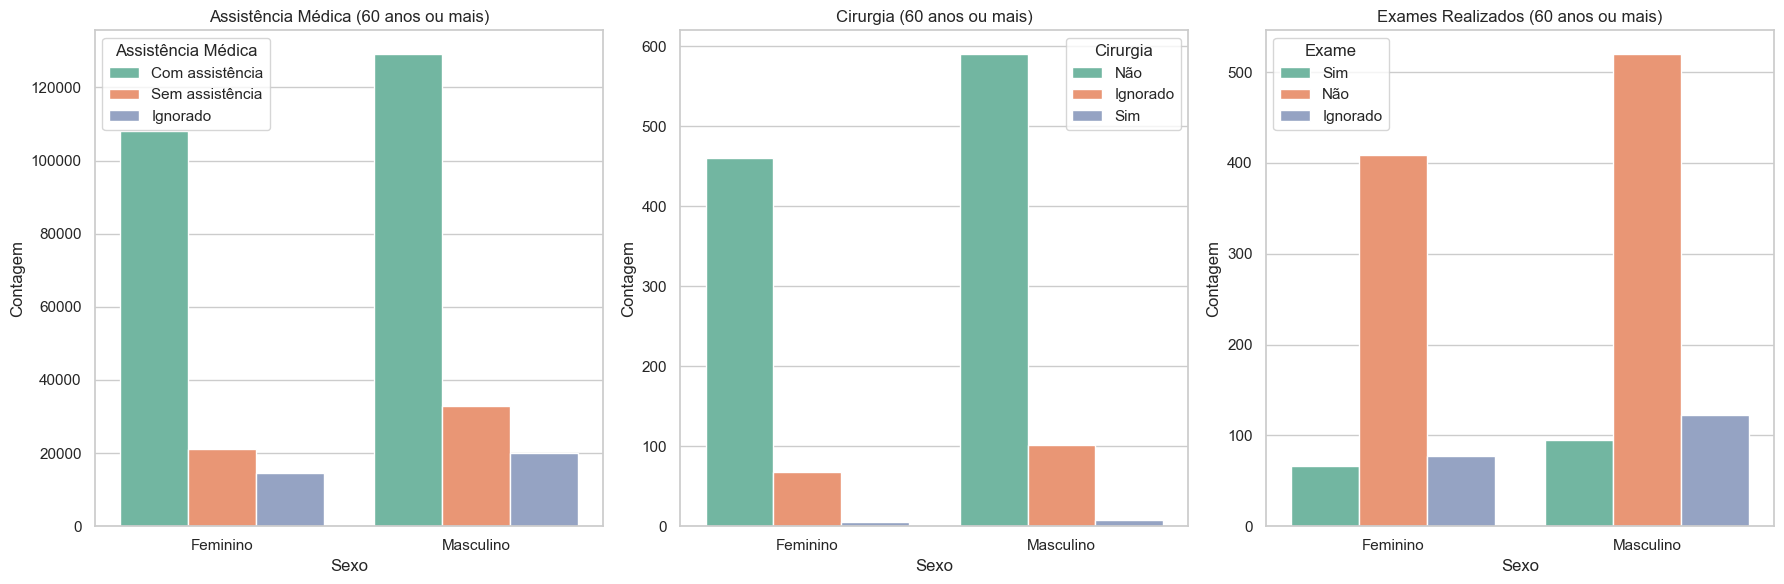

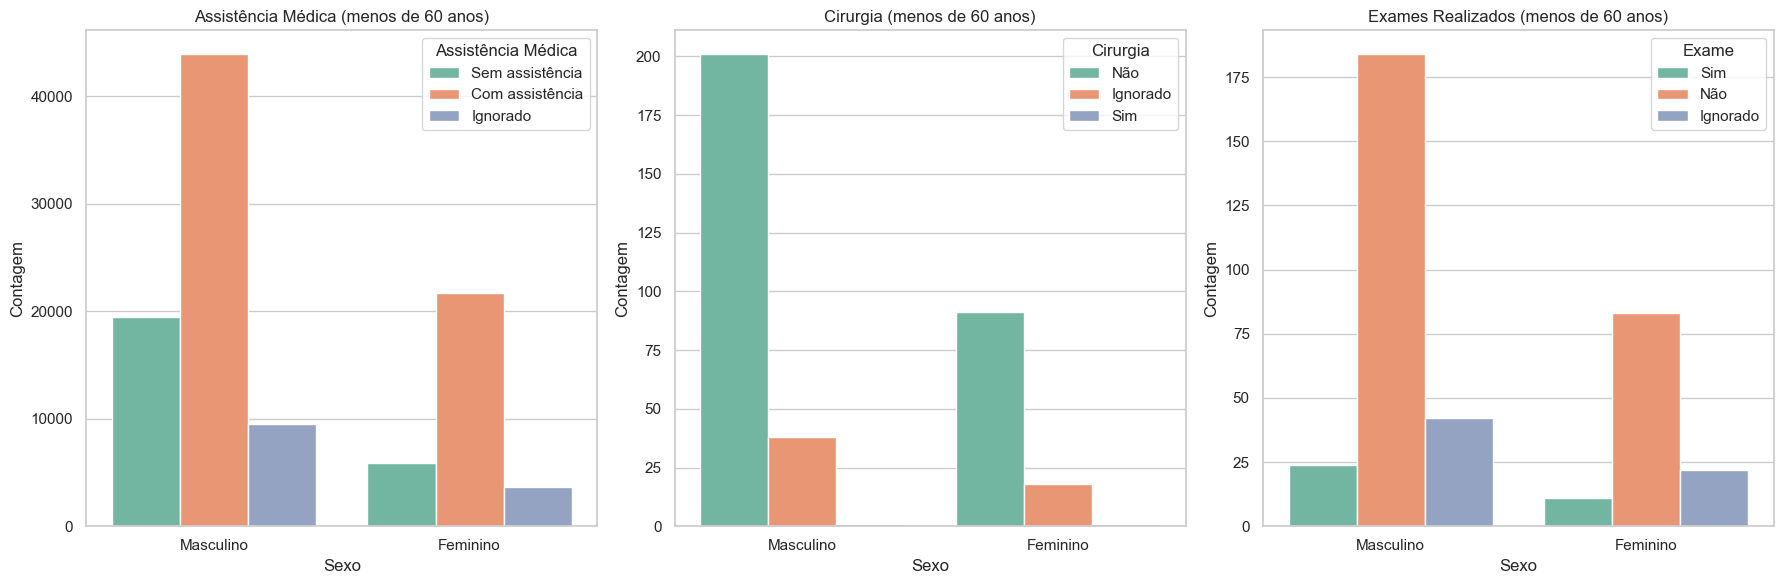

In [22]:
# Mapeamento para sexo
mapeamento_sexo = {1: 'Masculino', 2: 'Feminino'}

# Aplicar o mapeamento à coluna de sexo em ambos os DataFrames
df_infarto_maior_60['sexo'] = df_infarto_maior_60['sexo'].map(mapeamento_sexo)
df_infarto_menor_60['sexo'] = df_infarto_menor_60['sexo'].map(mapeamento_sexo)

# Criando os gráficos para maiores de 60 anos
plt.figure(figsize=(18, 6))

# Gráfico de assistência médica
plt.subplot(1, 3, 1)
sns.countplot(data=df_infarto_maior_60, x='sexo', hue='assistencia_medica', palette='Set2')
plt.title('Assistência Médica (60 anos ou mais)')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(title='Assistência Médica')

# Gráfico de cirurgia
plt.subplot(1, 3, 2)
sns.countplot(data=df_infarto_maior_60, x='sexo', hue='cirurgia', palette='Set2')
plt.title('Cirurgia (60 anos ou mais)')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(title='Cirurgia')

# Gráfico de exames realizados
plt.subplot(1, 3, 3)
sns.countplot(data=df_infarto_maior_60, x='sexo', hue='exame', palette='Set2')
plt.title('Exames Realizados (60 anos ou mais)')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(title='Exame')

plt.tight_layout()
plt.show()

# Criando os gráficos para menores de 60 anos
plt.figure(figsize=(18, 6))

# Gráfico de assistência médica
plt.subplot(1, 3, 1)
sns.countplot(data=df_infarto_menor_60, x='sexo', hue='assistencia_medica', palette='Set2')
plt.title('Assistência Médica (menos de 60 anos)')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(title='Assistência Médica')

# Gráfico de cirurgia
plt.subplot(1, 3, 2)
sns.countplot(data=df_infarto_menor_60, x='sexo', hue='cirurgia', palette='Set2')
plt.title('Cirurgia (menos de 60 anos)')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(title='Cirurgia')

# Gráfico de exames realizados
plt.subplot(1, 3, 3)
sns.countplot(data=df_infarto_menor_60, x='sexo', hue='exame', palette='Set2')
plt.title('Exames Realizados (menos de 60 anos)')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(title='Exame')

plt.tight_layout()
plt.show()


In [23]:
df_infarto_maior_60_filtrado = df_infarto_maior_60[df_infarto_maior_60['sexo'] != 0]
df_infarto_menor_60_filtrado = df_infarto_menor_60[df_infarto_menor_60['sexo'] != 0]

percentuais_maior_60 = df_infarto_maior_60_filtrado.groupby('sexo').agg({'exame': lambda x: (x == 1).mean() * 100,
                                                                         'assistencia_medica': lambda x: (x == 'Com assistência').mean() * 100}).reset_index()

print("Percentual de realização de exames e assistência médica para maiores de 60 anos:")
print(percentuais_maior_60)

percentuais_menor_60 = df_infarto_menor_60_filtrado.groupby('sexo').agg({'exame': lambda x: (x == 1).mean() * 100,
                                                                         'assistencia_medica': lambda x: (x == 'Com assistência').mean() * 100}).reset_index()

print("\nPercentual de realização de exames e assistência médica para menores de 60 anos:")
print(percentuais_menor_60)


Percentual de realização de exames e assistência médica para maiores de 60 anos:
        sexo  exame  assistencia_medica
0   Feminino    0.0           50.386812
1  Masculino    0.0           47.891498

Percentual de realização de exames e assistência médica para menores de 60 anos:
        sexo  exame  assistencia_medica
0   Feminino    0.0           47.885772
1  Masculino    0.0           41.023152


In [24]:
percentuais_exames_maior_60 = df_infarto_maior_60_filtrado.groupby('sexo')['exame'].value_counts(normalize=True).mul(100).reset_index(name='percentual')
percentuais_exames_maior_60 = percentuais_exames_maior_60[percentuais_exames_maior_60['sexo'] != 0]  # Excluindo sexo igual a 0

print("Percentual de realização de exames para maiores de 60 anos:")
print(percentuais_exames_maior_60)

percentuais_exames_menor_60 = df_infarto_menor_60_filtrado.groupby('sexo')['exame'].value_counts(normalize=True).mul(100).reset_index(name='percentual')
percentuais_exames_menor_60 = percentuais_exames_menor_60[percentuais_exames_menor_60['sexo'] != 0]  # Excluindo sexo igual a 0

print("\nPercentual de realização de exames para menores de 60 anos:")
print(percentuais_exames_menor_60)


Percentual de realização de exames para maiores de 60 anos:
        sexo     exame  percentual
0   Feminino       Não   74.094203
1   Feminino  Ignorado   13.949275
2   Feminino       Sim   11.956522
3  Masculino       Não   70.556309
4  Masculino  Ignorado   16.553596
5  Masculino       Sim   12.890095

Percentual de realização de exames para menores de 60 anos:
        sexo     exame  percentual
0   Feminino       Não   71.551724
1   Feminino  Ignorado   18.965517
2   Feminino       Sim    9.482759
3  Masculino       Não   73.600000
4  Masculino  Ignorado   16.800000
5  Masculino       Sim    9.600000
